In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
url = "../amz_uk_price_prediction_dataset.csv"

df = pd.read_csv(url)

In [6]:
df.shape

(2443651, 9)

In [7]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [8]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
# Frequency Tables:

# Generate a frequency table for the product category.

frequency_table = df["category"].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [12]:
# Which are the top 5 most listed product categories?

top5 = frequency_table.head(5)
top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

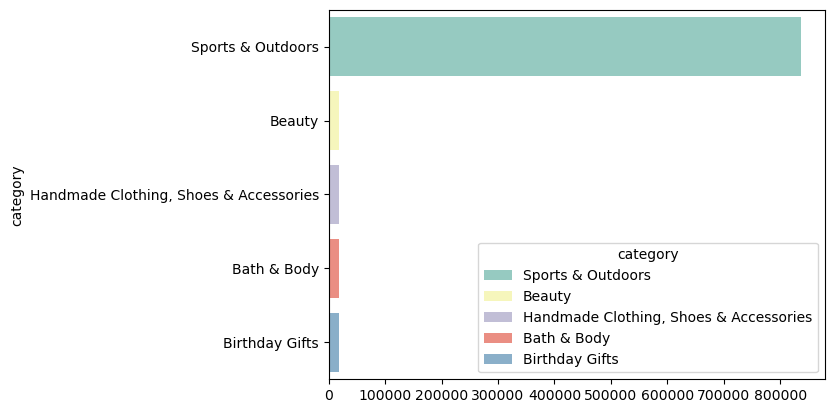

In [17]:
# Visualizations:

# Display the distribution of products across different categories using a bar chart. 
# If you face problems understanding the chart, do it for a subset of top categories.

ax=sns.barplot(y=top5.index, x=top5.values, palette="Set3", hue=top5.index, legend=True )
sns.move_legend(ax, "lower right")
plt.show()

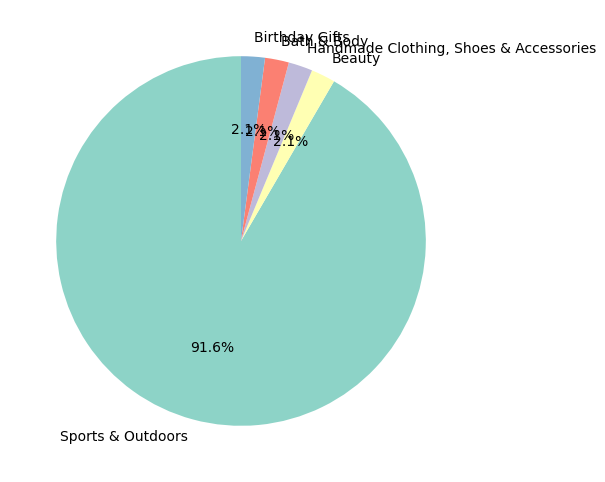

In [30]:
# For a subset of top categories, visualize their proportions using a pie chart. 
# Does any category dominate the listings? - Yes, Sports & Outdoors

plt.figure(figsize=(6, 6))
plt.pie(
    top5.values,
    labels=top5.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Set3"))

plt.show()

In [31]:
# Measures of Centrality:

# Calculate the mean, median, and mode for the price of products.

mean_price = df["price"].mean()
print(f"Mean: {mean_price}")

median_price = df["price"].median()
print(f"Median: {median_price}")

mode_price = df["price"].mode()
print(f"Mode: {mode_price}")

Mean: 89.24380943923663
Median: 19.09
Mode: 0    9.99
Name: price, dtype: float64


In [36]:
# Measures of Dispersion:

# Determine the variance, standard deviation, range, and interquartile range for product price.
var_price = df["price"].var()
print(f"Variance: {var_price:.2f}")
print()

std_price = df["price"].std()
print(f"Standard Deviation: {std_price:.2f}")
print()

range_price = df["price"].max() - df["price"].min()
print(f"Range: {range_price:.2f}")
print()

quantiles_price = df["price"].quantile([0.25, 0.5, 0.75])
print("Quantiles:")
print(quantiles_price)

Variance: 119445.49

Standard Deviation: 345.61

Range: 100000.00

Quantiles:
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


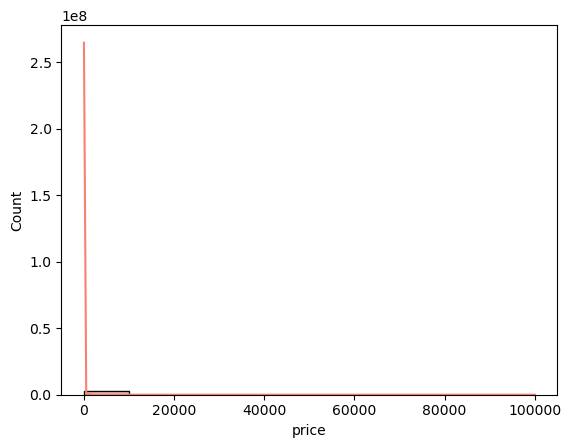

In [39]:
# Visualizations:

# Is there a specific price range where most products fall? 
# Plot a histogram to visualize the distribution of product prices. 

fig, axes = plt.subplots()
sns.histplot(df["price"], kde=True, bins=10, color="salmon", ax=axes);
plt.show()

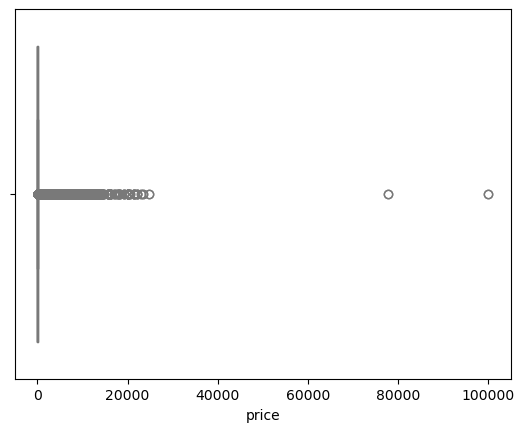

In [41]:
# Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(x = df["price"], color="lightblue");
plt.show()

In [43]:
# Measures of Centrality:

# Calculate the mean, median, and mode for the rating of products.
mean_stars = df["stars"].mean()
print(f"Mean: {mean_stars:.2f}")

median_stars = df["stars"].median()
print(f"Median: {median_stars:.2f}")

mode_stars = df["stars"].mode()
print(f"Mode: {mode_stars}")

Mean: 2.15
Median: 0.00
Mode: 0    0.0
Name: stars, dtype: float64


In [47]:
# How do customers generally rate products?

df["stars"].value_counts().head(10)

# When customers rate the products, it's mainly positive reviews.

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
Name: count, dtype: int64

In [52]:
# Measures of Dispersion:

# Determine the variance, standard deviation, and interquartile range for product rating.
var_stars = df["stars"].var()
print(f"Variance: {var_stars:.1f}")
print()

std_stars = df["stars"].std()
print(f"Standard Deviation: {std_stars:.1f}")
print()

quantiles_stars = df["stars"].quantile([0, 0.20, 0.40, 0.60, 0.80, 1])
print("Quantiles:")
print(quantiles_stars)

Variance: 4.8

Standard Deviation: 2.2

Quantiles:
0.0    0.0
0.2    0.0
0.4    0.0
0.6    4.0
0.8    4.5
1.0    5.0
Name: stars, dtype: float64


In [53]:
# Shape of the Distribution:

# Calculate the skewness and kurtosis for the rating column.
skew_stars = df["stars"].skew()
kurtosis_stars = df["stars"].kurtosis()

skew_stars, kurtosis_stars

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

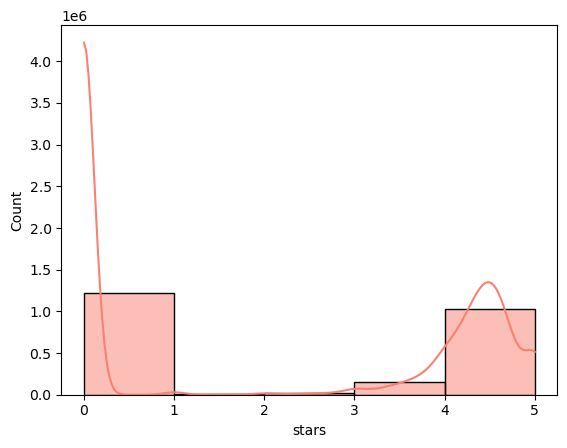

In [55]:
# Visualizations:

# Plot a histogram to visualize the distribution of product ratings. 

fig, axes = plt.subplots()
sns.histplot(df["stars"], kde=True, bins=5, color="salmon", ax=axes);
plt.show()
